In [1]:
import numpy as np
from keras.datasets import imdb
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.models import Sequential
from keras.preprocessing import sequence
from matplotlib import pyplot

In [2]:
n_unique_words = 10000  # cut texts after this number of words
maxlen = 200
batch_size = 128

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)


17473536/17464789 [==============================] - 0s 0us/step


In [4]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=12, validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
196/196 [==============================] - 189s 929ms/step - loss: 0.4467 - accuracy: 0.7817 - val_loss: 0.3279 - val_accuracy: 0.8556
Epoch 2/12
196/196 [==============================] - 179s 915ms/step - loss: 0.2457 - accuracy: 0.9053 - val_loss: 0.3128 - val_accuracy: 0.8656
Epoch 3/12
196/196 [==============================] - 178s 908ms/step - loss: 0.1817 - accuracy: 0.9322 - val_loss: 0.3347 - val_accuracy: 0.8673
Epoch 4/12
196/196 [==============================] - 178s 910ms/step - loss: 0.1370 - accuracy: 0.9512 - val_loss: 0.3862 - val_accuracy: 0.8548
Epoch 5/12
196/196 [==============================] - 177s 903ms/step - loss: 0.1172 - accuracy: 0.9588 - val_loss: 0.4241 - val_accuracy: 0.8587
Epoch 6/12
196/196 [==============================] - 183s 934ms/step - loss: 0.1026 - accuracy: 0.9642 - val_loss: 0.5320 - val_accuracy: 0.8546
Epoch 7/12
196/196 [==============================] - 180s 921ms/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.5517 -

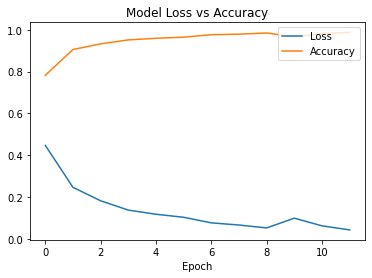

In [6]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('Model Loss vs Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc='upper right')
pyplot.show()